# Estimation of the Hubble constant from SN Ia data
Marina S. Cagliari, Zucheng Gao, Dimitrios Kantzas, Francesca Calore, Yoan Genolini, Pasquale Serpico

In this notebook we will use the Union 2 SN catalog to estimate the Hubble constant.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

c = 299792.458 #km/s

The catalog is saved in the file `SCPUnion2.1_AllSNe.txt`.

Loading and visualizing the data:
- Read and print the column names
- Load the SN catalog

In [2]:
# your code here

with open('SCPUnion2.1_AllSNe.txt') as f:
    column_names = f.readline().split(' ')[1:-1]

SN_catalog = np.loadtxt('SCPUnion2.1_AllSNe.txt')

print(column_names)

['z', 'm', 'Δm', 'x₁', 'Δx₁', 'c', 'Δc', 'μ', 'Δμ']


The columns represents:
- $z$: redshift
- $m$, and $\Delta m$: apparent magnitude and its error
- $x_1$, $\Delta x_1$, $c$, $\Delta c$: correction factors to rescale the SN magnitudes
- $\mu$ and $\Delta \mu$: distance modulus and its error (corrected by the magnitude rescaling)

Let's make a Hubble-like plot with our data. The catalog contains the redshift 'z', which is related to the SN velocity ($v = c \, z$) and the distance modulus 'μ'.

The distance modulus, $\mu$, is related to the observed flux, $F$, by
$$F \propto 10^{-\frac{\mu}{2.5}} \, ,$$
and the observed flux to the distance, $d_L$, by
$$F = \frac{L}{4 \pi d_L^2} \, ,$$
where $L$ is the real luminosity of the object.

Assuming $L = 1$ in arbitrary units, compute the distance of the SN with $z<0.09$ and plot it against their velocity.

WARNING. Check if there are null data, e.g. value like -9999.

NOTE. The distances in this thi plot will be in arbitrary units

Text(0, 0.5, 'Velocity [km/s]')

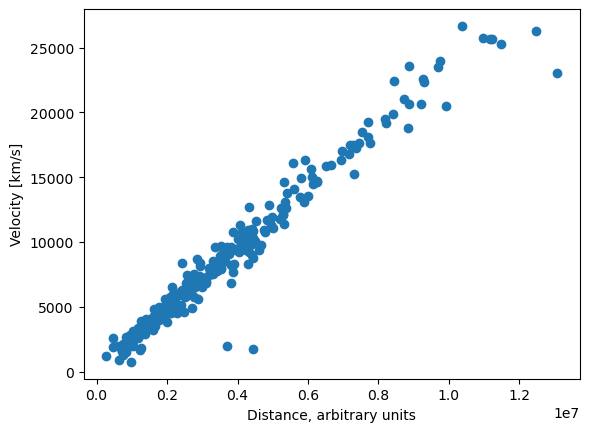

In [3]:
# your code here

#remove null datapoints and get small redshift
sel = (SN_catalog[:,1] != - 9999) & (SN_catalog[:,0] < 0.09)

plt.scatter(np.sqrt(1 / 4 / np.pi / 10**(-SN_catalog[sel,-2] / 2.5)), c * SN_catalog[sel,0])
plt.xlabel('Distance, arbitrary units')
plt.ylabel('Velocity [km/s]')

The plot shows that the Universe is expanding! Locally the expansion rate is constant and follow the (Hubble-Lemaitre) law:
$$v = H_0 \, d \, ,$$
where $H_0$ is the so called Hubble constant. Dimensionally the Hubble constant is the inverse of a time, but conventionally is measured in $\frac{\text{km / s}}{\text{Mpc}}$ to explicitely show it is an expansion rate.

### Exercise: estimate the Hubble constant from SN data

Assuming we are working at low redshift $z << 1$, we can write:
$$v = c z = H_0 d \, .$$

From the relation between absolute and apparent magnitudes
$$m = M  + 5 \text{log}_{10} (d_L / 1 \text{Mpc}) + 25 \, ,$$
and knowing that the distance modulus is
$$ \mu = m_{eff} + M_0 \quad \text{with} \quad m_{eff} = m + \gamma x_1 - \delta C \, .$$ 

You aim to get a **linear relation** between the distance modulus and the redshift, where the slope is somehow related to the Hubble constant. To do so, go though the following steps:
1. Manipulate the equations above to obtain a relation between $\mu$ and $\text{log}_{10}(z)$

**Solution**. We can write the distance logarithm as a function of the absolute magnitude and distance modulus

$$ \text{log}_{10}(d_L) = \frac{\mu  + M_0 - \gamma x_1 + \delta C - M - 25}{5}$$

Taking the logarithm of the Hubble law and substituting the eq above

$$ \mu(z) = M + \tilde{M} + 25 + 5 \text{log}_{10}(c/H_0) + 5 \text{log}_{10}(z)$$

where $\tilde{M} = M_0 - \gamma x_1 + \delta C$

2. Now you want to be able to expand  $\text{log}_{10}(z)$,
    - Assume $H_0 = 3000 \, l_0  \, \frac{\text{km / s}}{\text{Mpc}}$ and substitute to get $\text{log}_{10}(z/l_0)$ in your relation
    - Knowing that $50 \, \frac{\text{km / s}}{\text{Mpc}} < H_0 < 100 \, \frac{\text{km / s}}{\text{Mpc}}$, $0.0166 < l_0 < 0.0333$. Under which condition over $z$ you can expand $\text{log}_{10}(z/l_0)$? 

**Solution**. Substituting above 
$$\mu(z) = M - \tilde{M} + 25 + 5 \text{log}_{10}(c/3000 \text{km/s}) + 5 \text{log}_{10}(z/l_0)$$

If $z/l_0 \sim 1$, $\text{log}_{10} (z/l_0) \approx 1/\text{log}(10) (z/l_0 - 1)$. We can apply this if $0.0166 < z < 0.0333$.

3. Expand $\text{log}_{10}(z/l_0)$ to obtain the linear relation between the distance modulus and the redshift.

**Solution**. $$\mu(z) = M - \tilde{M} + 35 + \frac{5}{\text{log}(10)} + \frac{5}{\text{log}(10) l_0} z = \alpha + \beta z$$

4. Now that you have the relation $\mu(z) = \alpha + \beta z$, write down how to compute $H_0$ and its error $\Delta H_0$ given $\beta$ and its error $\Delta \beta$. 

**Solution**. $$H_0 = 3000 \frac{5}{\text{log}(10)} \frac{1}{\beta} \frac{\text{km/s}}{\text{Mpc}}$$ 
$$\Delta H_0 = 3000 \frac{5}{\text{log}(10)} \frac{1}{\beta^2} \Delta \beta \frac{\text{km/s}}{\text{Mpc}}$$

Now you can perform the fit to get $\alpha$ and $\beta$ and give an estimate of the Hubble constant and its error.

**NOTE**. Remember to remove the null data points from your sample and select only the object within the redshift range of interest.

**TIP**. Use the linear regression routine in `scipy`

In [4]:
#select the non null datapoints and within the redshift where the approximation holds

selz = (SN_catalog[:,-2] != -9999) & (SN_catalog[:,0] > 0.0166) & (SN_catalog[:,0] < 0.0333)

print(np.sum(selz))

111


In [5]:
#fit alpha and beta

result = sp.stats.linregress(SN_catalog[selz,0], SN_catalog[selz,-2])
print(result.slope)

95.06823398254946


In [6]:
#computing H0 and its error from the fitted values

H0 = 3000 * 5 / np.log(10) / result.slope
DH0 = 3000 * 5 / np.log(10) / result.slope**2 * result.stderr

print(f'Estimated H0: {H0:.5f} +- {DH0:.5f}')

Estimated H0: 68.52360 +- 3.20430
